In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats  # 통계 분석용 라이브러리

# 랜덤 시드 고정
np.random.seed(42)

# 1. 데이터 생성
# 서울: 평균 55,000원, 표준편차 15,000원인 정규분포 데이터 100개
seoul_sales = np.random.normal(loc=55000, scale=15000, size=100)

# 부산: 평균 60,000원, 표준편차 15,000원인 정규분포 데이터 100개 (서울보다 5천원 높게 설정)
busan_sales = np.random.normal(loc=60000, scale=15000, size=100)

# 데이터프레임으로 합치기
df_seoul = pd.DataFrame({'city': 'Seoul', 'amount': seoul_sales})
df_busan = pd.DataFrame({'city': 'Busan', 'amount': busan_sales})
df_stats = pd.concat([df_seoul, df_busan]).reset_index(drop=True)

print(f"✅ 데이터 생성 완료: 총 {len(df_stats)}건")
print(df_stats.groupby('city')['amount'].describe().round(2))

✅ 데이터 생성 완료: 총 200건
       count      mean       std       min       25%       50%       75%  \
city                                                                       
Busan  100.0  60334.57  14305.03  31218.43  47915.09  61261.61  68072.56   
Seoul  100.0  53442.30  13622.53  15703.82  45986.41  53095.66  61089.28   

             max  
city              
Busan  100802.54  
Seoul   82784.17  


C:\Users\sangh\AppData\Local\Temp\ipykernel_19892\61610775.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_stats, x='city', y='amount', palette='Set2')


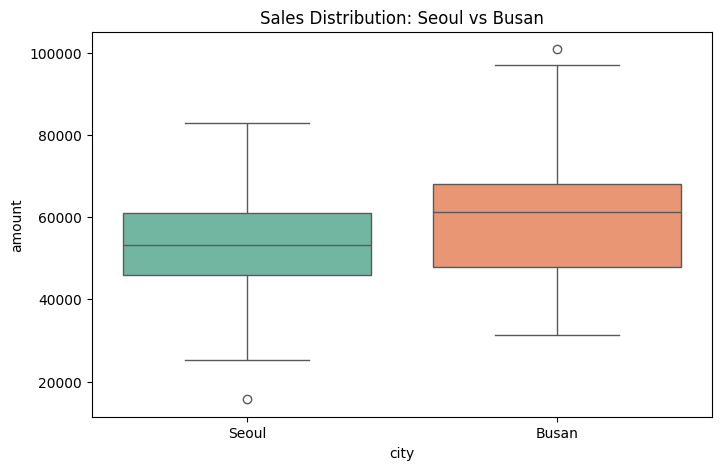

In [3]:
plt.figure(figsize=(8, 5))

sns.boxplot(data=df_stats, x='city', y='amount', palette='Set2')
plt.title("Sales Distribution: Seoul vs Busan")
plt.show()

In [4]:
t_stat, p_val = stats.ttest_ind(seoul_sales, busan_sales)

print(f"--- 📊 T-test 결과 ---")
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# 해석 출력
if p_val < 0.05:
    print("👉 결론: P-value가 0.05보다 작으므로, 서울과 부산의 매출 차이는 '통계적으로 유의미'합니다.")
    print("   (즉, 우연이 아니라 진짜로 부산이 더 많이 씁니다.)")
else:
    print("👉 결론: P-value가 0.05보다 크므로, '통계적으로 차이가 없다'고 봅니다.")
    print("   (평균은 달라 보이지만, 그냥 우연일 확률이 높습니다.)")

--- 📊 T-test 결과 ---
T-statistic: -3.4891
P-value: 0.0006
👉 결론: P-value가 0.05보다 작으므로, 서울과 부산의 매출 차이는 '통계적으로 유의미'합니다.
   (즉, 우연이 아니라 진짜로 부산이 더 많이 씁니다.)


--- 📊 상관계수 행렬 (Correlation Matrix) ---
             age    amount
age     1.000000  0.967582
amount  0.967582  1.000000


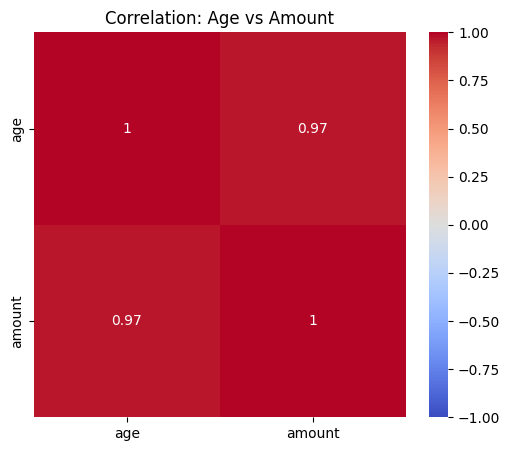

In [6]:
# 상관분석용 가상 데이터 생성
# 나이가 많을수록 구매액이 높아지도록 설정
np.random.seed(42)
ages = np.random.randint(20, 60, 100) # 20~60세 100명
amounts = ages * 2000 + np.random.randint(-10000, 10000, 100) # 나이 * 2000원 + 랜덤 오차

df_corr = pd.DataFrame({'age': ages, 'amount': amounts})

correlation = df_corr.corr()

print("--- 📊 상관계수 행렬 (Correlation Matrix) ---")
print(correlation)

plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation: Age vs Amount")
plt.show()